## Preprocessing and Feature Engingeering

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import StandardScaler
from housing_functions import *

%matplotlib inline

In [18]:
train=pd.read_csv('../datasets/df_dummies_clean.csv')
train.head()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_quality,overall_cond,year_built,year_remod/add,mas_vnr_area,...,pud___multilevel___incl_split_lev/foyer,split_foyer,split_or_multi_level,garage_area*garage_cars,ms_zoning_fv*neighborhood_somerst,gr_liv_area*totrms_abvgrd,2nd_flr_sf*house_style_2story,exterior_2nd_brk_cmn*neighborhood_npkvill,gr_liv_area*1st_flr_sf,kitchen_quality_ta*exterior_quality_ta
0,109,533352170,2-STORY 1946 & NEWER,0.0,13517,6,8,1976,2005,289.0,...,0,0,0,950.0,0,8874,754,0,1072275,0
1,544,531379050,2-STORY 1946 & NEWER,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,1118.0,0,16976,1209,0,1937386,0
2,153,535304180,1-STORY 1946 & NEWER ALL STYLES,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,246.0,0,5285,0,0,1117249,0
3,318,916386060,2-STORY 1946 & NEWER,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,800.0,0,10108,700,0,1074336,1
4,255,906425045,1-1/2 STORY FINISHED ALL AGES,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,968.0,0,8670,0,0,1200795,1


## Feature Engineering

In [19]:
# Top 10 Correlations with Saleprice by absolute value (edited)
def corr_rank (df, target):
    
    """
    df = pandas dataframe or matrix
    target = target variable or column from dataframe
    """
    y= df[target]
    plt.figure(figsize=(10,50))
    sns.heatmap(df.corr()[[target]].sort_values(by = target, 
                                                    ascending=False),
               annot = True,
               cmap='RdBu_r',

               );

In [20]:
train.head(10)

,id,pid,ms_subclass,lot_frontage,lot_area,overall_quality,overall_cond,year_built,year_remod/add,mas_vnr_area,...,pud___multilevel___incl_split_lev/foyer,split_foyer,split_or_multi_level,garage_area*garage_cars,ms_zoning_fv*neighborhood_somerst,gr_liv_area*totrms_abvgrd,2nd_flr_sf*house_style_2story,exterior_2nd_brk_cmn*neighborhood_npkvill,gr_liv_area*1st_flr_sf,kitchen_quality_ta*exterior_quality_ta
0,109,533352170,2-STORY 1946 & NEWER,0.0,13517,6,8,1976,2005,289.0,...,0,0,0,950.0,0,8874,754,0,1072275,0
1,544,531379050,2-STORY 1946 & NEWER,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,1118.0,0,16976,1209,0,1937386,0
2,153,535304180,1-STORY 1946 & NEWER ALL STYLES,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,246.0,0,5285,0,0,1117249,0
3,318,916386060,2-STORY 1946 & NEWER,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,800.0,0,10108,700,0,1074336,1
4,255,906425045,1-1/2 STORY FINISHED ALL AGES,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,968.0,0,8670,0,0,1200795,1
5,138,535126040,1-STORY 1946 & NEWER ALL STYLES,137.0,16492,6,6,1966,2002,0.0,...,0,0,0,1156.0,0,11328,0,0,3564544,0
6,2827,908186070,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,35.0,3675,6,5,2005,2006,82.0,...,1,0,0,1050.0,0,5360,0,0,1149184,1
7,145,535154050,1-STORY 1946 & NEWER ALL STYLES,0.0,12160,5,5,1959,1959,180.0,...,0,0,0,1062.0,0,7128,0,0,1411344,1
8,1942,535353130,1-STORY 1946 & NEWER ALL STYLES,0.0,15783,5,5,1952,1952,0.0,...,0,0,0,420.0,0,5544,0,0,853776,1
9,1956,535426130,2-STORY 1946 & NEWER,70.0,11606,5,5,1969,1969,192.0,...,0,0,0,1008.0,0,18720,1040,0,2163200,0


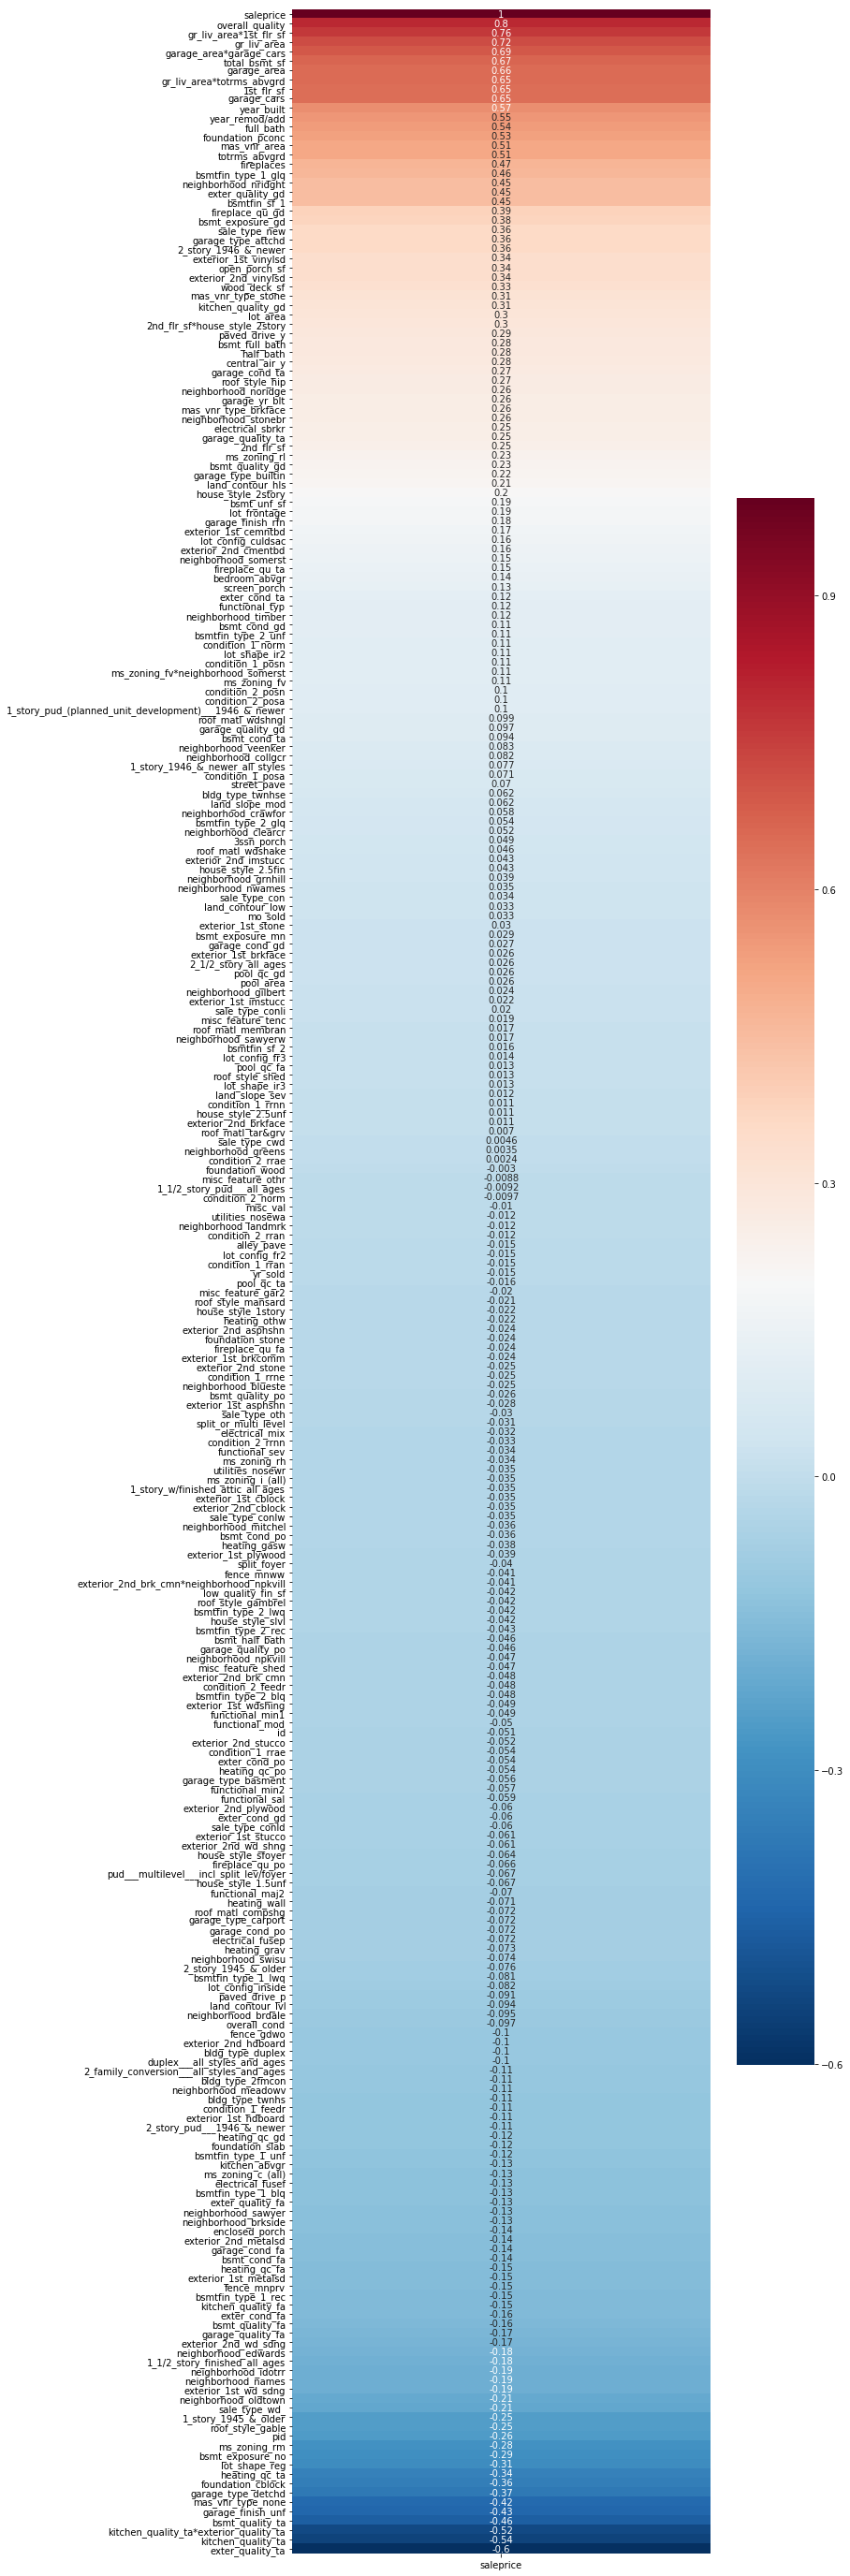

In [21]:
corr_rank (train, 'saleprice')

In [22]:
features_Q=['exter_quality_ta','kitchen_quality_ta',
            'bsmt_quality_ta','garage_finish_unf',
            'mas_vnr_type_none','garage_type_detchd',
            'overall_quality','gr_liv_area',
            'garage_area','garage_cars',
            'total_bsmt_sf','1st_flr_sf',
            'year_built','year_remod/add',
            'full_bath','foundation_pconc',
            'totrms_abvgrd','mas_vnr_area'
            ]
X_Q= train[features_Q]
y= train['saleprice']

In [23]:
def plot_vars(model,X, y, ncols=2):
    nrows = int(np.ceil((len(columns))/2))
    plt.figure(figsize=(12,9));
    fig, ax = plt.subplots(1,len(X.columns.values), nrows=nrows,ncols=ncols,sharey=True,
                           constrained_layout=True,figsize=(10, 2.5*nrows))
    model=model()
    for i,e in enumerate(X.columns):
      model.fit(X[e].values[:,np.newaxis], y.values)
      ax[i].set_title("Best fit line")
      ax[i].set_xlabel(str(e))
      ax[i].set_ylabel('Sale Price')
      ax[i].scatter(X[e].values[:,np.newaxis], y,color='g')
      ax[i].plot(X[e].values[:,np.newaxis], 
      model2.predict(X[e].values[:,np.newaxis]),color='k')
    # Generate a scatterplot of predicted values versus actual values.
    plt.scatter(preds, y, s=8, color='skyblue', alpha = 0.9)

    # Plot a line.
    plt.plot([0, np.max(y)],
             [0, np.max(y)],
             color = 'black')

    # Tweak title and axis labels.
    plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
    plt.ylabel("Actual Values: $y$", fontsize = 20)
    plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [24]:
def test_model(model, dataframe, features, y):
    """
    model = regression model 
    name = Str. that you would like the model to be named
    dataframe = pandas dataframe as data source
    features =  series or array of columns to test in model
    y = target variable
    
    """
    X = dataframe[features]
    y = y

    # train test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                        random_state = 13)

    title = model
    title.fit(X_train, y_train)

    print(f'Train score: {title.score(X_train, y_train)}')
    print('Cross val score: {}'.format(cross_val_score(title, 
                                            X_train, y_train, cv=5).mean()))
    print(f'Test score: {title.score(X_val, y_val)}')

    val_preds = pd.DataFrame(title.predict(X_val), columns = ['val_preds'])
    val_preds.head()
    
    val_preds['val_true']= y_val.values
    val_preds['val_errors']=val_preds['val_preds']-val_preds['val_true']

    # Plot predictions vs true values
    plt.scatter(x = val_preds['val_preds'], y = val_preds['val_errors']);
    plt.axhline(0, color='red');

Train score: 0.847148745418373
Cross val score: 0.8382540374593772
Test score: 0.8383615030541132


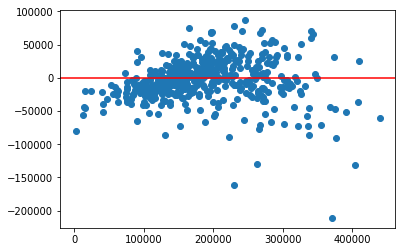

In [25]:
model_Q = LinearRegression()
test_model(model_Q, train, features_Q, train['saleprice'])

### Checking if the log of salesprice accounts for those outliers

In [26]:
# Lets see if the log of salesprice accounts for those outliers

test_model(LinearRegression, train, features_Q, train['log_saleprice'])

KeyError: 'log_saleprice'

In [ ]:
train.columns

In [ ]:
pt = PowerTransformer()
log_y_train = pt.fit_transform(y_train)


model.fit(X_train, log_y_train)
model.predict(X_train, )=preds
pt.inverse_transform(preds)

In [ ]:
# Testing interaction columns
features_2 = ['garage_area*garage_cars',
             'ms_zoning_fv*neighborhood_somerst',
             'gr_liv_area*totrms_abvgrd',
             '1st_flr_sf*total_bsmt_sf',
             '2nd_flr_sf*house_style_2story',
             'exterior_2nd_brk cmn*neighborhood_npkvill',
             'overall_quality',
              'gr_liv_area*1st_flr_sf',
             'kitchen_quality_ta*exterior_quality_ta']

In [ ]:
model_2=LinearRegression()
test_model(model_2, train, features_2, train['saleprice'])

In [ ]:
plot_vars(LinearRegression, train)

In [ ]:
# train test split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state = 13)

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

In [ ]:
print(f'Train Score: {model_1.score(X_train, y_train)}')

print(f'Cross Val Score: {cross_val_score(model_1, X_train, y_train,cv=5).mean()}')

print(f' Test score: {model_1.score(X_test, y_test)}')

In [ ]:
#make predictions_preds = model_1.predict()
val_preds = pd.DataFrame(model_1.predict(X_test), columns = ['val_preds'])
val_preds.head()

## Prediction time

In [ ]:
test[features_Q]

In [ ]:
def predict_and_submit (dataframe, model, features, submission_number):
    """
    dataframe = test dataframe
    model = model
    features = matrix of variables to test
    submission_number = iteration number(str) to help in labeling files and columns
        
    """
    test_preds=model.predict(dataframe[features])
    test['preds_1'] = test_preds
    submission=test.loc[:, ['id','preds_1']]
    submission.rename(columns = {'id':'Id', 'preds_1':'SalePrice'}, inplace = True)
    # Save submission as csv
    filename='submission_'+str(submission_number)
    submission.to_csv(f'../Submissions/{filename}.csv',index=False)
    submission.head()

In [ ]:
# A null value in the test set needs to be addressed
test[features_Q].isnull().sum()
test['mas_vnr_area'].fillna(0, inplace=True)

In [ ]:
predict_and_submit(test, model_Q, features_Q, '2')

In [188]:
test=pd.read_csv('../datasets/test_clean.csv')
test.columns
test.shape

(879, 281)

In [189]:
test_dummies = test.columns[-25:]

In [190]:
test.head()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_quality,overall_cond,year_built,year_remod/add,mas_vnr_area,...,exterior_2nd_stone,functional_sev,pool_qc_fa,heating_othw,bsmt_cond_po,heating_wall,condition_2_rrnn,1_1/2_story_pud___all_ages,garage_quality_fa,saleprice
0,2658,902301120,2 FAMILY CONVERSION - ALL STYLES AND AGES,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2718,905108090,DUPLEX - ALL STYLES AND AGES,0.0,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2414,528218130,2-STORY 1946 & NEWER,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,1-STORY 1945 & OLDER,60.0,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
4,625,535105100,1-STORY 1946 & NEWER ALL STYLES,0.0,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
test['neighborhood_GrnHill'] = 0
test['neighborhood_Landmrk'] = 0
test.shape

(879, 254)

In [133]:
test[features_1].shape

KeyError: "['neighborhood_Veenker', 'neighborhood_Blueste', 'neighborhood_IDOTRR', 'neighborhood_Gilbert', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_BrkSide', 'neighborhood_Timber', 'neighborhood_MeadowV', 'neighborhood_ClearCr', 'neighborhood_Edwards', 'neighborhood_NAmes', 'neighborhood_StoneBr', 'neighborhood_SawyerW', 'neighborhood_NridgHt', 'neighborhood_Somerst', 'neighborhood_NPkVill', 'overall_qual', 'neighborhood_BrDale', 'neighborhood_Greens', 'neighborhood_Sawyer', 'neighborhood_SWISU', 'neighborhood_CollgCr', 'neighborhood_OldTown', 'neighborhood_Crawfor', 'neighborhood_Mitchel'] not in index"

In [134]:
model_Q.predict(test[[features_Q]])

KeyError: "None of [Index([('exter_quality_ta', 'kitchen_quality_ta', 'bsmt_quality_ta', 'garage_finish_unf', 'mas_vnr_type_none', 'garage_type_detchd', 'overall_quality', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath', 'foundation_pconc', 'totrms_abvgrd', 'mas_vnr_area')], dtype='object')] are in the [columns]"

In [135]:
test_preds=model_1.predict(test[features_1])

KeyError: "['neighborhood_Veenker', 'neighborhood_Blueste', 'neighborhood_IDOTRR', 'neighborhood_Gilbert', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_BrkSide', 'neighborhood_Timber', 'neighborhood_MeadowV', 'neighborhood_ClearCr', 'neighborhood_Edwards', 'neighborhood_NAmes', 'neighborhood_StoneBr', 'neighborhood_SawyerW', 'neighborhood_NridgHt', 'neighborhood_Somerst', 'neighborhood_NPkVill', 'overall_qual', 'neighborhood_BrDale', 'neighborhood_Greens', 'neighborhood_Sawyer', 'neighborhood_SWISU', 'neighborhood_CollgCr', 'neighborhood_OldTown', 'neighborhood_Crawfor', 'neighborhood_Mitchel'] not in index"

In [137]:
# look at sample sub reg csv on kaggle to make sure that the format matches

In [138]:
sample=pd.read_csv('../datasets/sample_sub_reg.csv')
sample.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


In [139]:
test['preds_1'] = test_preds

NameError: name 'test_preds' is not defined

In [140]:
submission_1=test.loc[:, ['id','preds_1']]
submission_1.head()

/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,id,preds_1
0,2658,NaN
1,2718,NaN
2,2414,NaN
3,1989,NaN
4,625,NaN


In [141]:
submission_1.rename(columns = {'id':'Id', 'preds_1':'SalePrice'}, inplace = True)
submission_1.head

<bound method NDFrame.head of        Id  SalePrice
0    2658        NaN
1    2718        NaN
2    2414        NaN
3    1989        NaN
4     625        NaN
..    ...        ...
874  1662        NaN
875  1234        NaN
876  1373        NaN
877  1672        NaN
878  1939        NaN

[879 rows x 2 columns]>

In [142]:
submission_1.to_csv('../Submissions/submission_1.csv',index=False)

### Let's try something simpler
I'm going to get a baseline score of just the overall quality and price.

Train score: 0.6409079350539744
Cross val score: 0.6350885474470311
Test score: 0.6544745133665353


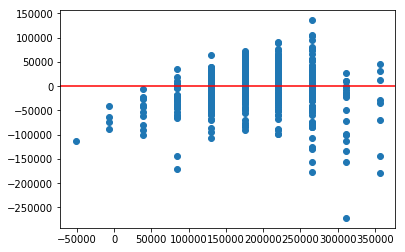

In [143]:
model_3 = LinearRegression()
features_3 = ['overall_quality']
X=train[features_3]
y=train['saleprice']
test_model(model_3, train, features_3, y )

In [144]:
pt = PowerTransformer()
pt.fit(X_train)
X_train = pt.transform(X_train)
X_test = pt.transform(X_test)

pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

NameError: name 'X_train' is not defined

In [145]:
def power_tran (dataframe, features, target):
    X=dataframe[features]
    y=dataframe[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    pt = PowerTransformer()
    pt.fit(X_train)
    X_train = pt.transform(X_train)
    X_test = pt.transform(X_test)
    pt_y = PowerTransformer()
    
    # PowerTransformer requires a matrix/DataFrame, 
    # which is why we're using the .to_frame() method on y_train
    pt_y.fit(y_train.to_frame()) 
    y_train_pt = pt_y.transform(y_train.to_frame())
    y_test_pt = pt_y.transform(y_test.to_frame())

In [177]:
def multi_model_test(dataframe, test_dataframe, features, target, model_number): 
    """
    dataframe = dataframe to train models
    test_dataframe = dataframe to test model and submit
    features = features to test
    target = target variable column name
    model_number = iteration number to append to filename
    
    Some of this was based on the Riley's notes on power transformation.
    """
    y=dataframe[target]
    X=dataframe[features]
# Test Train split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
# Scale variables
    pt = PowerTransformer()
    pt.fit(X_train)
    X_train = pt.transform(X_train)
    X_test = pt.transform(X_test)

# Convert back to matrix / Dataframe
    pt_y = PowerTransformer()
    pt_y.fit(y_train.to_frame()) 
    y_train_pt = pt_y.transform(y_train.to_frame())
    y_test_pt = pt_y.transform(y_test.to_frame())
    
# Test 3 models    
    lr = LinearRegression()
    lr_scores = cross_val_score(lr, X_train, y_train_pt, cv=3)
    lasso = LassoCV(n_alphas=200, cv=5)
    lasso_scores = cross_val_score(lasso, X_train, y_train_pt[:, 0], cv=3)
    ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
    ridge_scores = cross_val_score(ridge, X_train, y_train_pt, cv=3)
    print(f' The Linear Regression score is {lr_scores.mean()}.')
    print(" ")
    print(f' The Ridge score is {ridge_scores.mean()}.')    
    print(" ")
    print(f' The lasso score is {lasso_scores.mean()}.')
    print(" ")
    if ((lr_scores.mean() > ridge_scores.mean()) and (lr_scores.mean() > lasso_scores.mean())):
        lr.fit(X_train, y_train_pt)
        lr.score(X_train, y_train_pt)
        lr_test_score = lr.score(X_test, y_test_pt)
        print(f'Linear Regression was the closest model and returned a test score of {lr_test_score}.')
        print(" ")
        pred = lr.predict(X_test)
        pred_reversed = pt_y.inverse_transform(pred.reshape(-1,1))
        print(f'The R2 score is: {r2_score(y_test, pred_reversed)}.')
        model=lr
        pd.Series(lr.coef_, index=features).plot.bar(figsize=(15, 7));
    elif ((lasso_scores.mean() > ridge_scores.mean()) and 
    (lasso_scores.mean() > lr_scores.mean())):
        lasso.fit(X_train, y_train_pt)
        lasso.score(X_train, y_train_pt)
        lasso_test_score = lasso.score(X_test, y_test_pt)
        print(f'Lasso was the closest model and returned a test score of {lasso_test_score}.')
        print(" ")
        pred = lasso.predict(X_test)
        pred_reversed = pt_y.inverse_transform(pred.reshape(-1,1))
        print(f'The R2 score is: {r2_score(y_test, pred_reversed)}.')
        model=lasso
        pd.Series(lasso.coef_, index=features).plot.bar(figsize=(15, 7));
    else:
        ridge.fit(X_train, y_train_pt)
        ridge.score(X_train, y_train_pt)
        ridge_test_score = ridge.score(X_test, y_test_pt)
        print(f'Ridge was the closest model and returned a test score of {ridge_test_score}.')
        print(" ")
        pred = ridge.predict(X_test)
        pred_reversed = pt_y.inverse_transform(pred.reshape(-1,1))
        print(f'The R2 test score is: {r2_score(y_test, pred_reversed)}.')
        print(f'Ridge Coef = {ridge.coef_}')
        model=ridge
        pd.Series(data=ridge.coef_[0], index=features).plot.bar(figsize=(15, 7));
        
# # Scale variables and Prep Test data and Submission
    X_submit = test_dataframe[features]
    X_submit = pt.transform(X_submit) 
    pred = model.predict(X_submit)
    pred_reversed = pt_y.inverse_transform(pred.reshape(-1,1))
    submit = pd.DataFrame()
    submit['Id'] = test_dataframe.loc[:,'id']
    submit['SalePrice'] = pred_reversed
    filename='submission_'+str(model_number)
    submit.to_csv(f'../Submissions/{filename}.csv',index=False)

In [147]:
train.shape

(2049, 257)

In [148]:
test.shape

(879, 254)

/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


 The Linear Regression score is 0.8567428296062828.
 
 The Ridge score is 0.8568759646626866.
 
 The lasso score is 0.8571696432587957.
 
Lasso was the closest model and returned a test score of 0.8464942655034712.
 
The R2 score is: 0.8944755493745989.


/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


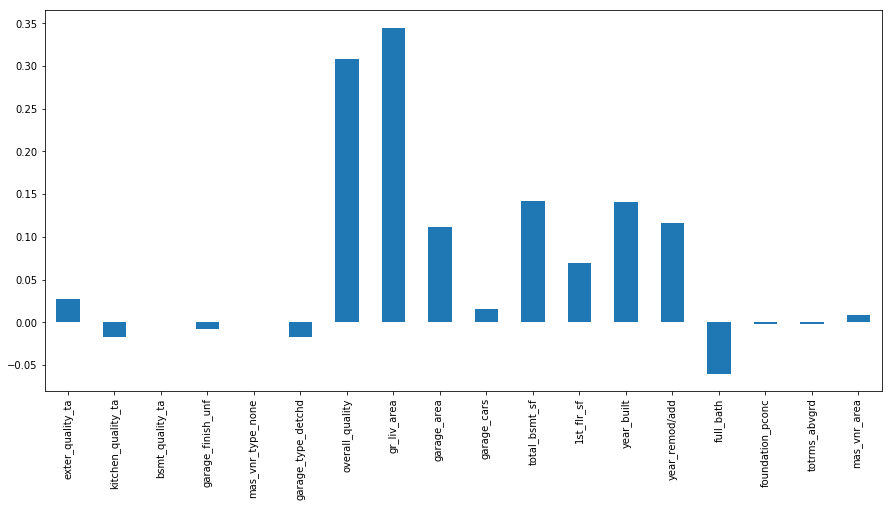

In [117]:
# power_tran(train, features_Q, 'saleprice')
multi_model_test(train, test, features_Q, 'saleprice', 3)

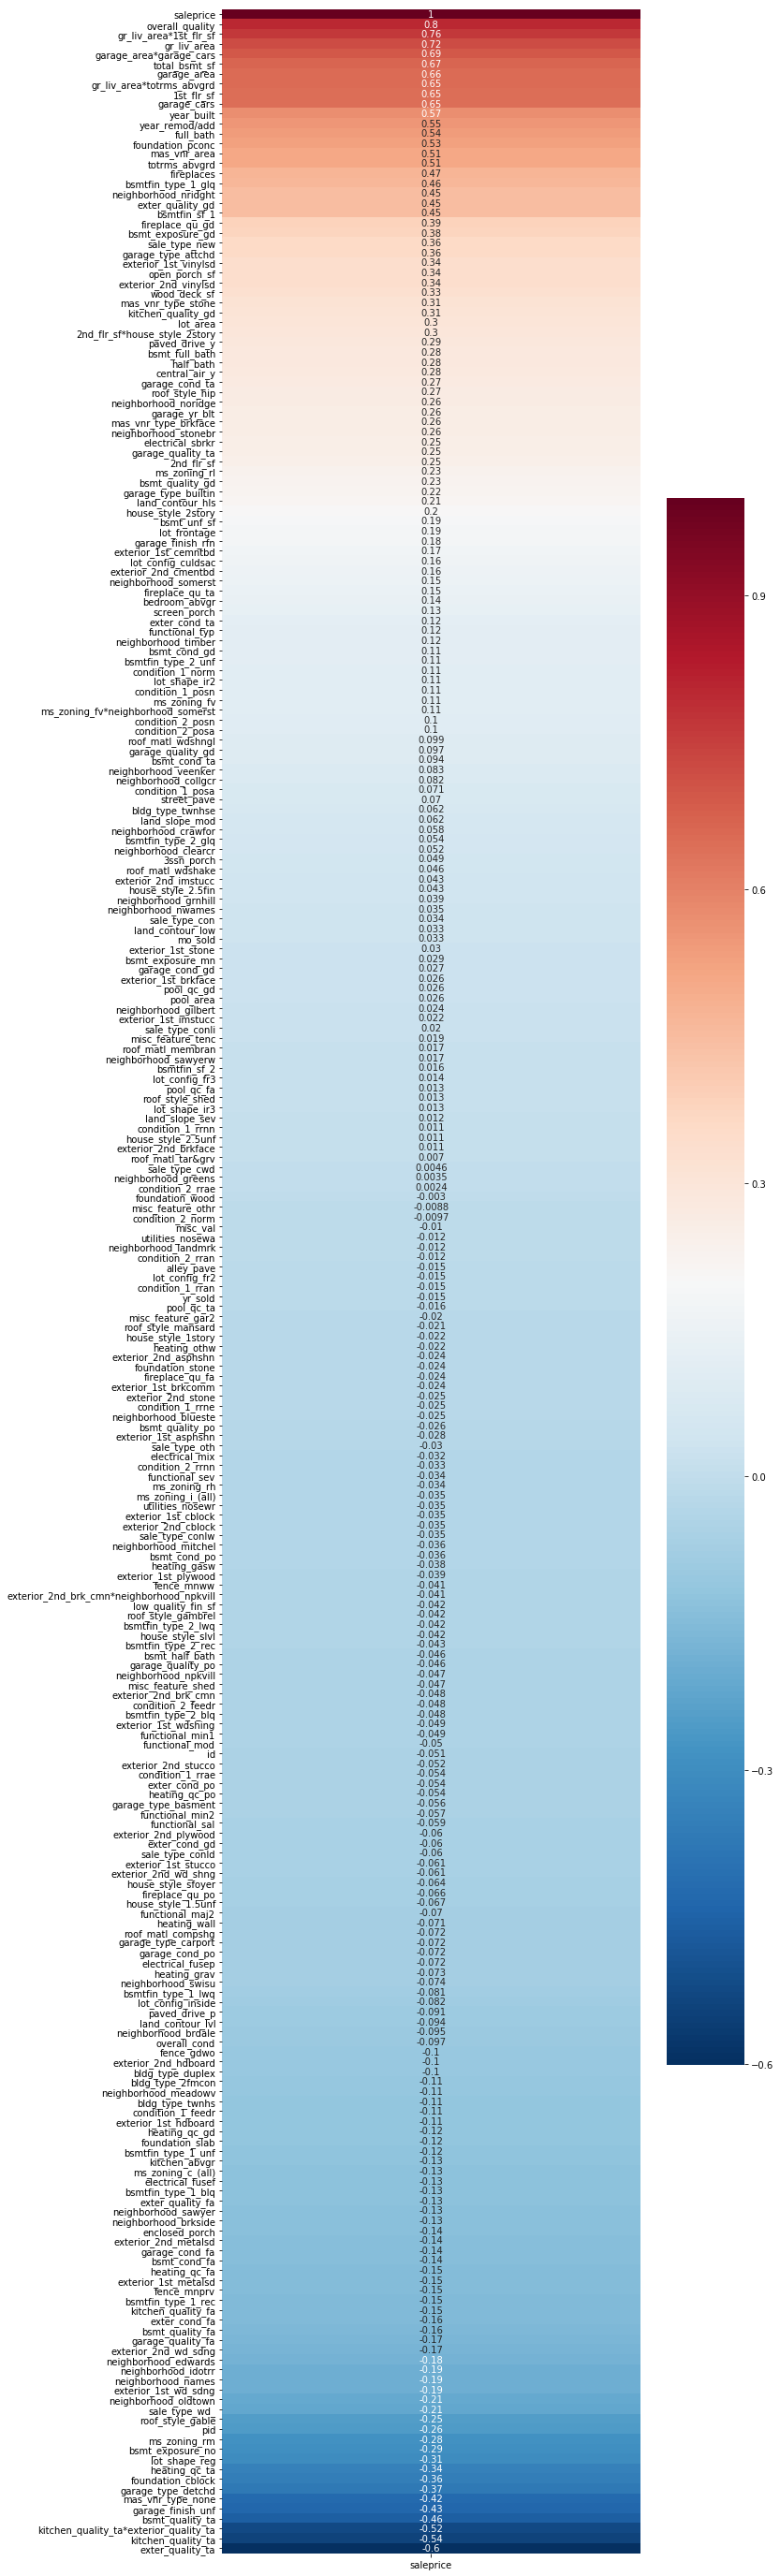

In [118]:
corr_rank(train, 'saleprice')

/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


 The Linear Regression score is 0.8450605560070007.
 
 The Ridge score is 0.8451192805334138.
 
 The lasso score is 0.845241602724862.
 
Lasso was the closest model and returned a test score of 0.8349380953671911.
 
The R2 score is: 0.8763273316044242.


/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


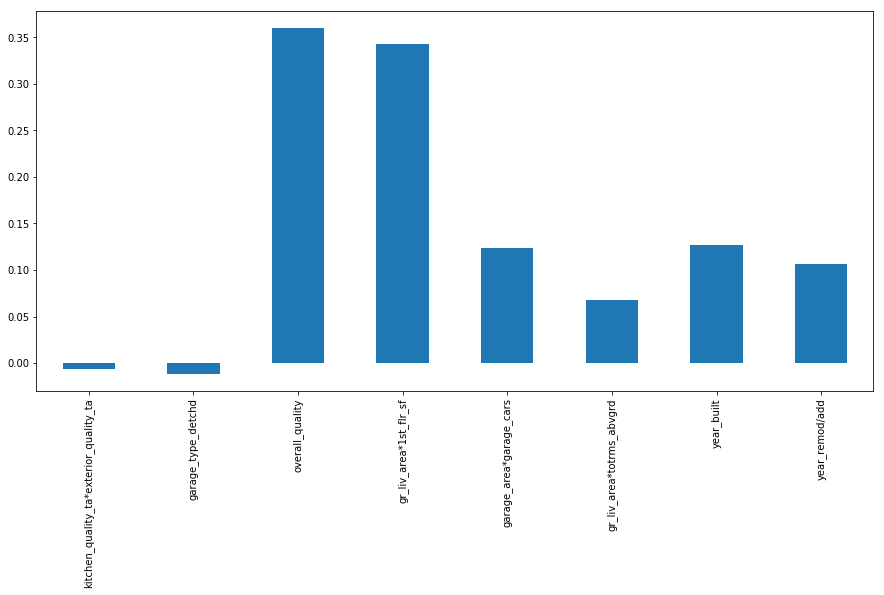

In [153]:
features_4 = ['kitchen_quality_ta*exterior_quality_ta',
             'garage_type_detchd',
             'overall_quality',
             'gr_liv_area*1st_flr_sf',
             'garage_area*garage_cars',
             'gr_liv_area*totrms_abvgrd',
             'year_built',
             'year_remod/add',
             ]
multi_model_test(train, test, features_4, 'saleprice', 4)

In [161]:
df4=pd.read_csv('../submissions/submission_4.csv')
df4.head()

,Id,SalePrice
0,2658,145962.424866
1,2718,196123.594161
2,2414,187454.813914
3,1989,124350.130337
4,625,165088.796562


/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


 The Linear Regression score is 0.847700259523724.
 
 The Ridge score is 0.8478166512185474.
 
 The lasso score is 0.8479988506546418.
 
Lasso was the closest model and returned a test score of 0.8345645707665723.
 
The R2 score is: 0.8777760214760184.


/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


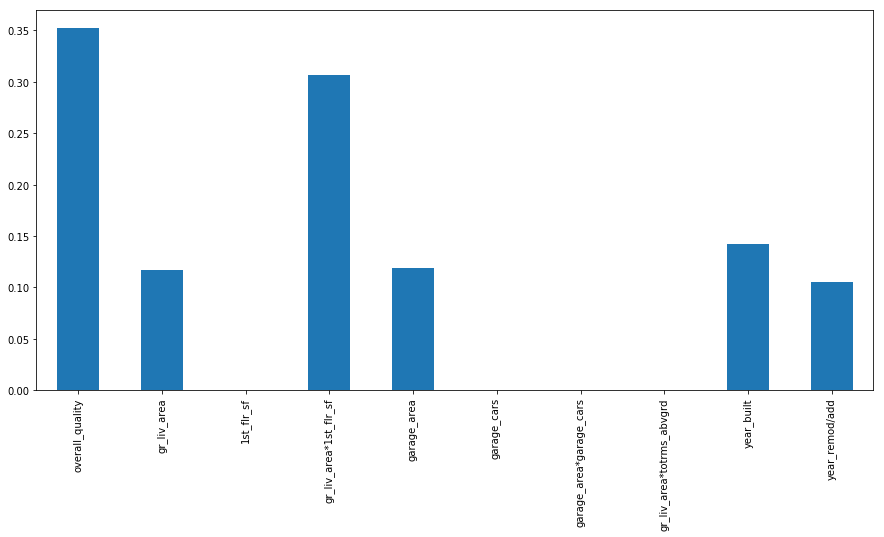

In [178]:
features_5 = ['overall_quality',
              'gr_liv_area',
              '1st_flr_sf',
             'gr_liv_area*1st_flr_sf',
              'garage_area',
              'garage_cars',
             'garage_area*garage_cars',
             'gr_liv_area*totrms_abvgrd',
             'year_built',
             'year_remod/add',
             ]
multi_model_test(train, test, features_5, 'saleprice', 5)

/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


 The Linear Regression score is 0.8482600153131052.
 
 The Ridge score is 0.848432028111825.
 
 The lasso score is 0.8483748476522974.
 
Ridge was the closest model and returned a test score of 0.8345408026871746.
 
The R2 test score is: 0.878198810154987.
Ridge Coef = [[0.34913076 0.20145808 0.0849889  0.15973382 0.12029764 0.14399049
  0.10772801]]


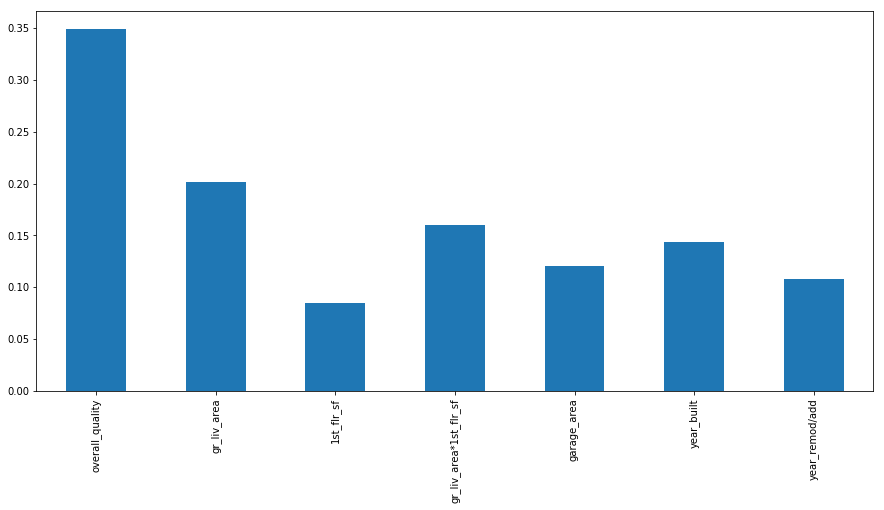

In [179]:
features_6=['overall_quality',
           'gr_liv_area',
           '1st_flr_sf',
           'gr_liv_area*1st_flr_sf',
           'garage_area',
           'year_built',
           'year_remod/add']

multi_model_test(train, test, features_6, 'saleprice', 6)

In [171]:
train.loc[ :,'ms_subclass']

0                  2-STORY 1946 & NEWER
1                  2-STORY 1946 & NEWER
2       1-STORY 1946 & NEWER ALL STYLES
3                  2-STORY 1946 & NEWER
4         1-1/2 STORY FINISHED ALL AGES
                     ...               
2044    1-STORY 1946 & NEWER ALL STYLES
2045               1-STORY 1945 & OLDER
2046      1-1/2 STORY FINISHED ALL AGES
2047    1-STORY 1946 & NEWER ALL STYLES
2048               2-STORY 1946 & NEWER
Name: ms_subclass, Length: 2049, dtype: object

In [175]:
test.shape

(879, 254)

/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


 The Linear Regression score is -6.151333157725775e+20.
 
 The Ridge score is 0.9039363512143902.
 
 The lasso score is 0.9174366117689007.
 


/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso was the closest model and returned a test score of 0.90980270169816.
 
The R2 score is: 0.943528666672559.


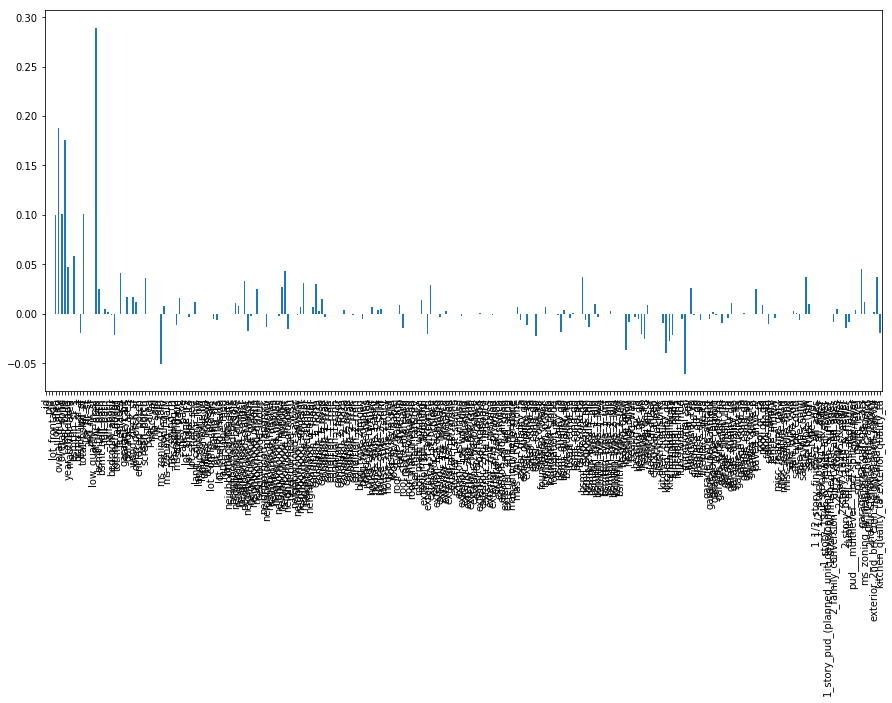

In [202]:
features_7 = train.drop(['ms_subclass','saleprice'], axis=1).columns
multi_model_test(train, test, features_7, 'saleprice', 7)

In [293]:
# Lets remove some of the less useful features.
# Test Train split
X=train[features_7]
y=train['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
lasso=LassoCV(alphas=200, cv=5)
# Scale variables
pt = PowerTransformer()
pt.fit(X_train)
X_train = pt.transform(X_train)
X_test = pt.transform(X_test)

# Convert back to matrix / Dataframe
pt_y = PowerTransformer()
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

print(f'x_train shape is {X_train.shape}, and y_train_pt shape is {y_train_pt.shape}')

lasso.fit(X_train, y_train_pt)
lasso.score(X_train, y_train_pt)
lasso_test_score = lasso.score(X_test, y_test_pt)
print(f'Lasso was the closest model and returned a test score of {lasso_test_score}.')
print(" ")
pred = lasso.predict(X_test)
pred_reversed = pt_y.inverse_transform(pred.reshape(-1,1))
print(f'The R2 score is: {r2_score(y_test, pred_reversed)}.')
model=lasso
pd.Series(lasso.coef_[0], index=features).plot.bar(figsize=(25, 7));

/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


x_train shape is (1536, 270), and y_train_pt shape is (1536, 1)


/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AxisError: axis -1 is out of bounds for array of dimension 0

In [214]:
y=train['saleprice']
X=train[features_7]
# Test Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale variables
pt = PowerTransformer()
pt.fit(X_train)
X_train = pt.transform(X_train)
X_test = pt.transform(X_test)

# Convert back to matrix / Dataframe
pt_y = PowerTransformer()
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())


lasso = LassoCV(n_alphas=200, cv=5)
lasso_scores = cross_val_score(lasso, X_train, y_train_pt[:, 0], cv=3)

lasso.fit(X_train, y_train_pt)
lasso.score(X_train, y_train_pt)
lasso_test_score = lasso.score(X_test, y_test_pt)
print(f'Lasso was the closest model and returned a test score of {lasso_test_score}.')
print(" ")
pred = lasso.predict(X_test)
pred_reversed = pt_y.inverse_transform(pred.reshape(-1,1))
print(f'The R2 score is: {r2_score(y_test, pred_reversed)}.')
model=lasso



/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso was the closest model and returned a test score of 0.90980270169816.
 
The R2 score is: 0.943528666672559.
shape is : (270, 270)


TypeError: sort_values() missing 1 required positional argument: 'by'

In [238]:
# Create dataframe to sort results
lasso.coef_
coef_df=pd.DataFrame(index=features_7, data=lasso.coef_)
# coef_df.sort_values(axis=1)
#print(f'shape is : {coef_df.shape}')
coef_df=coef_df.sort_values(by=[0])

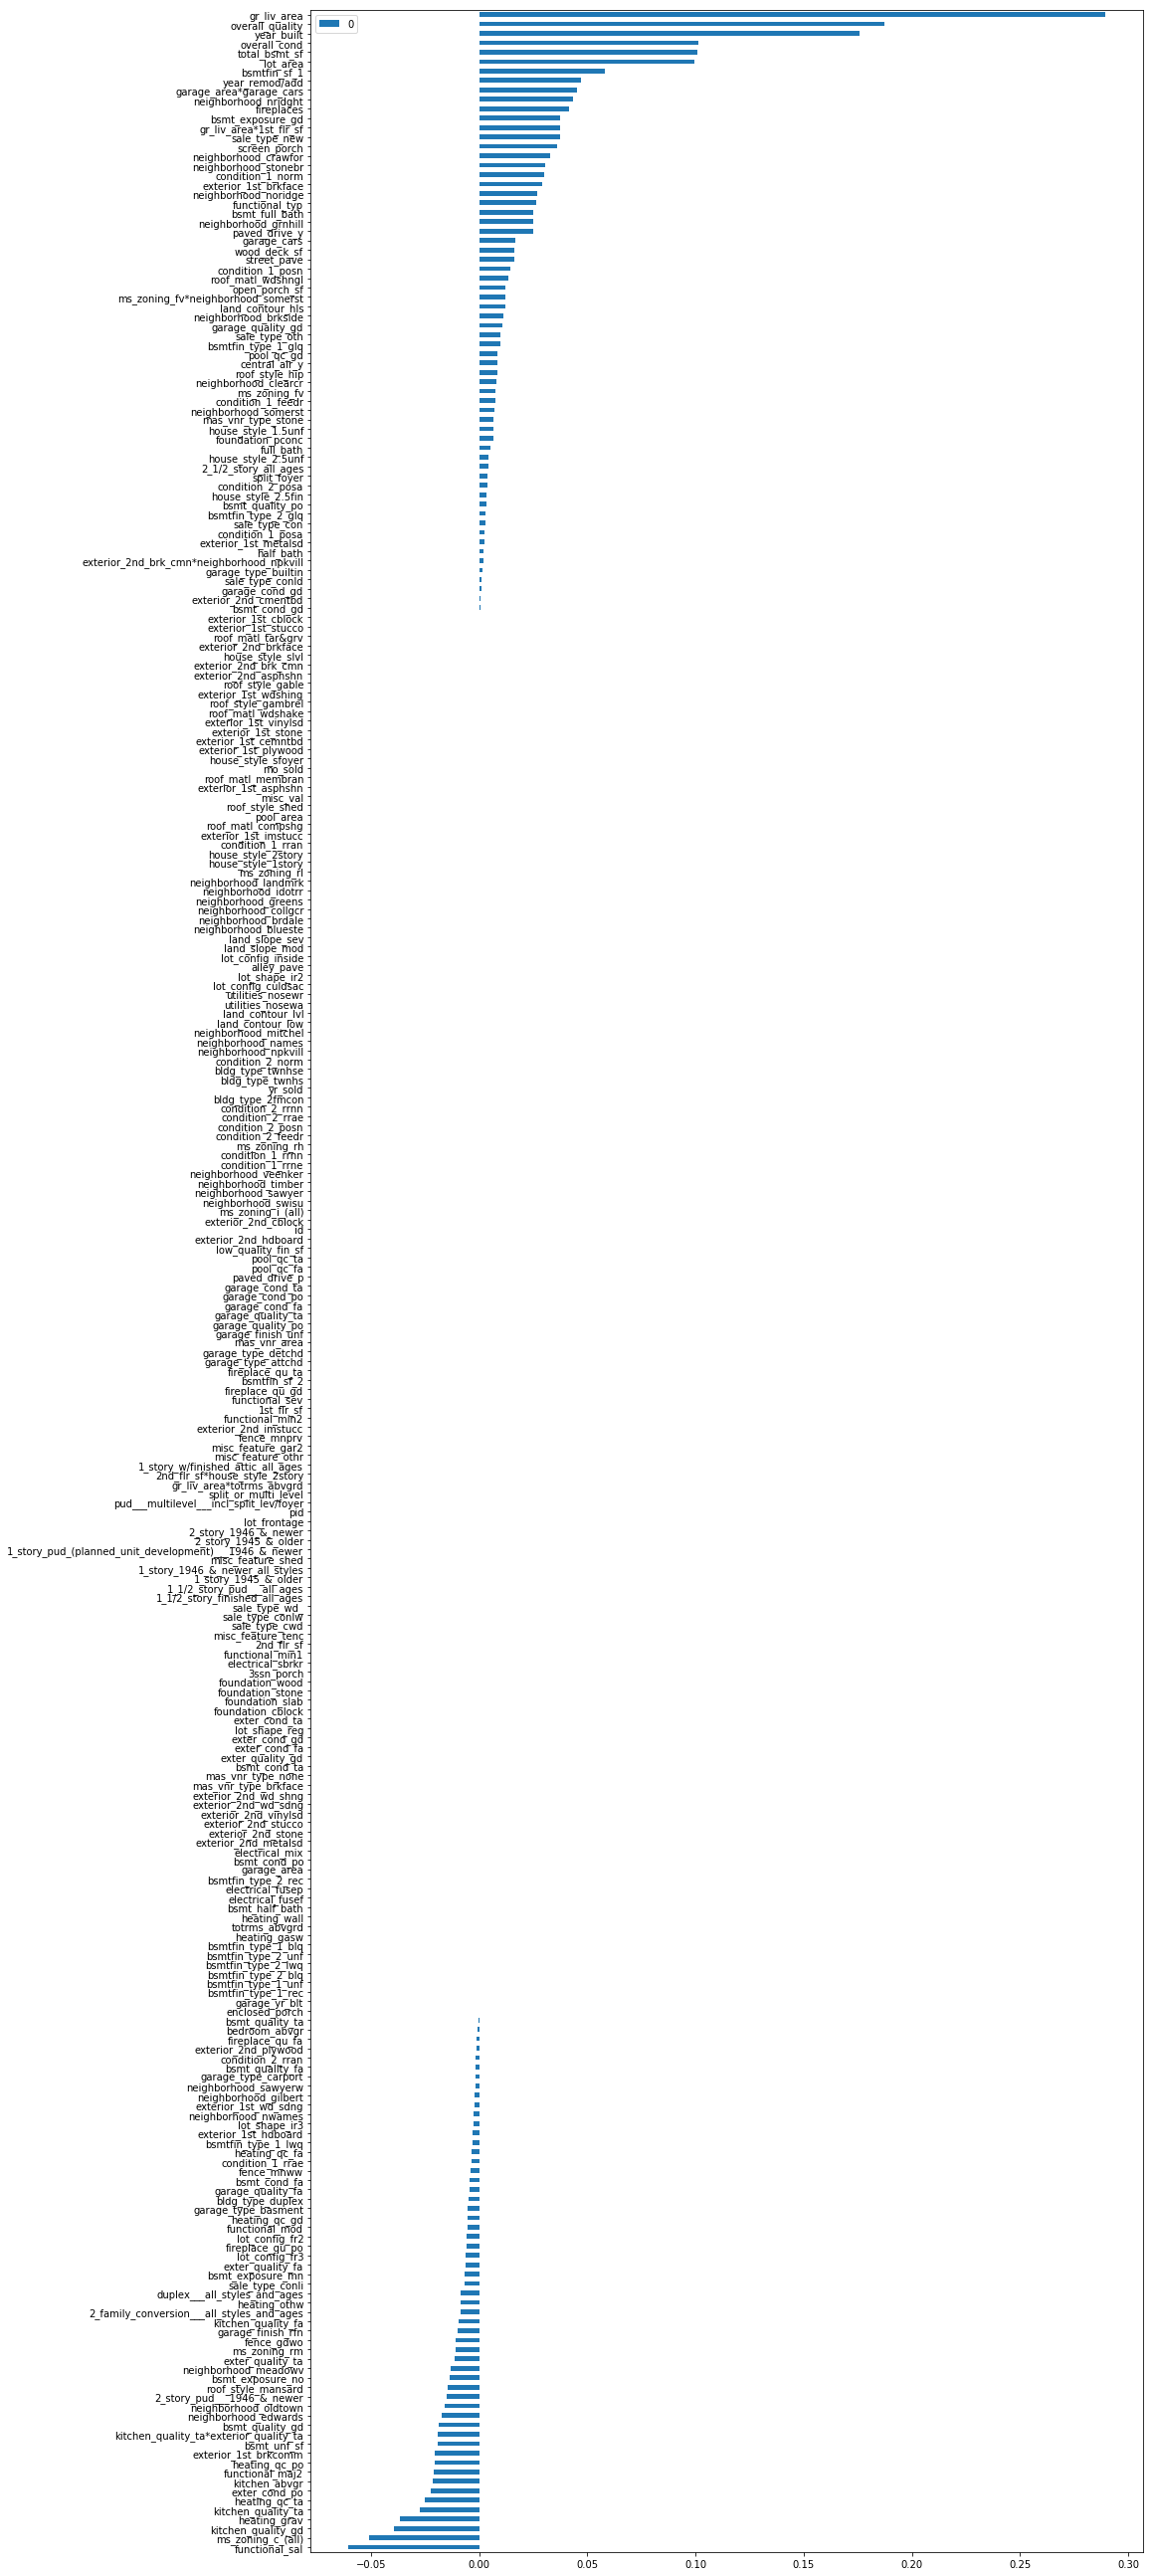

In [241]:
# Plot coeficients
coef_df.plot.barh(figsize=(15, 47));

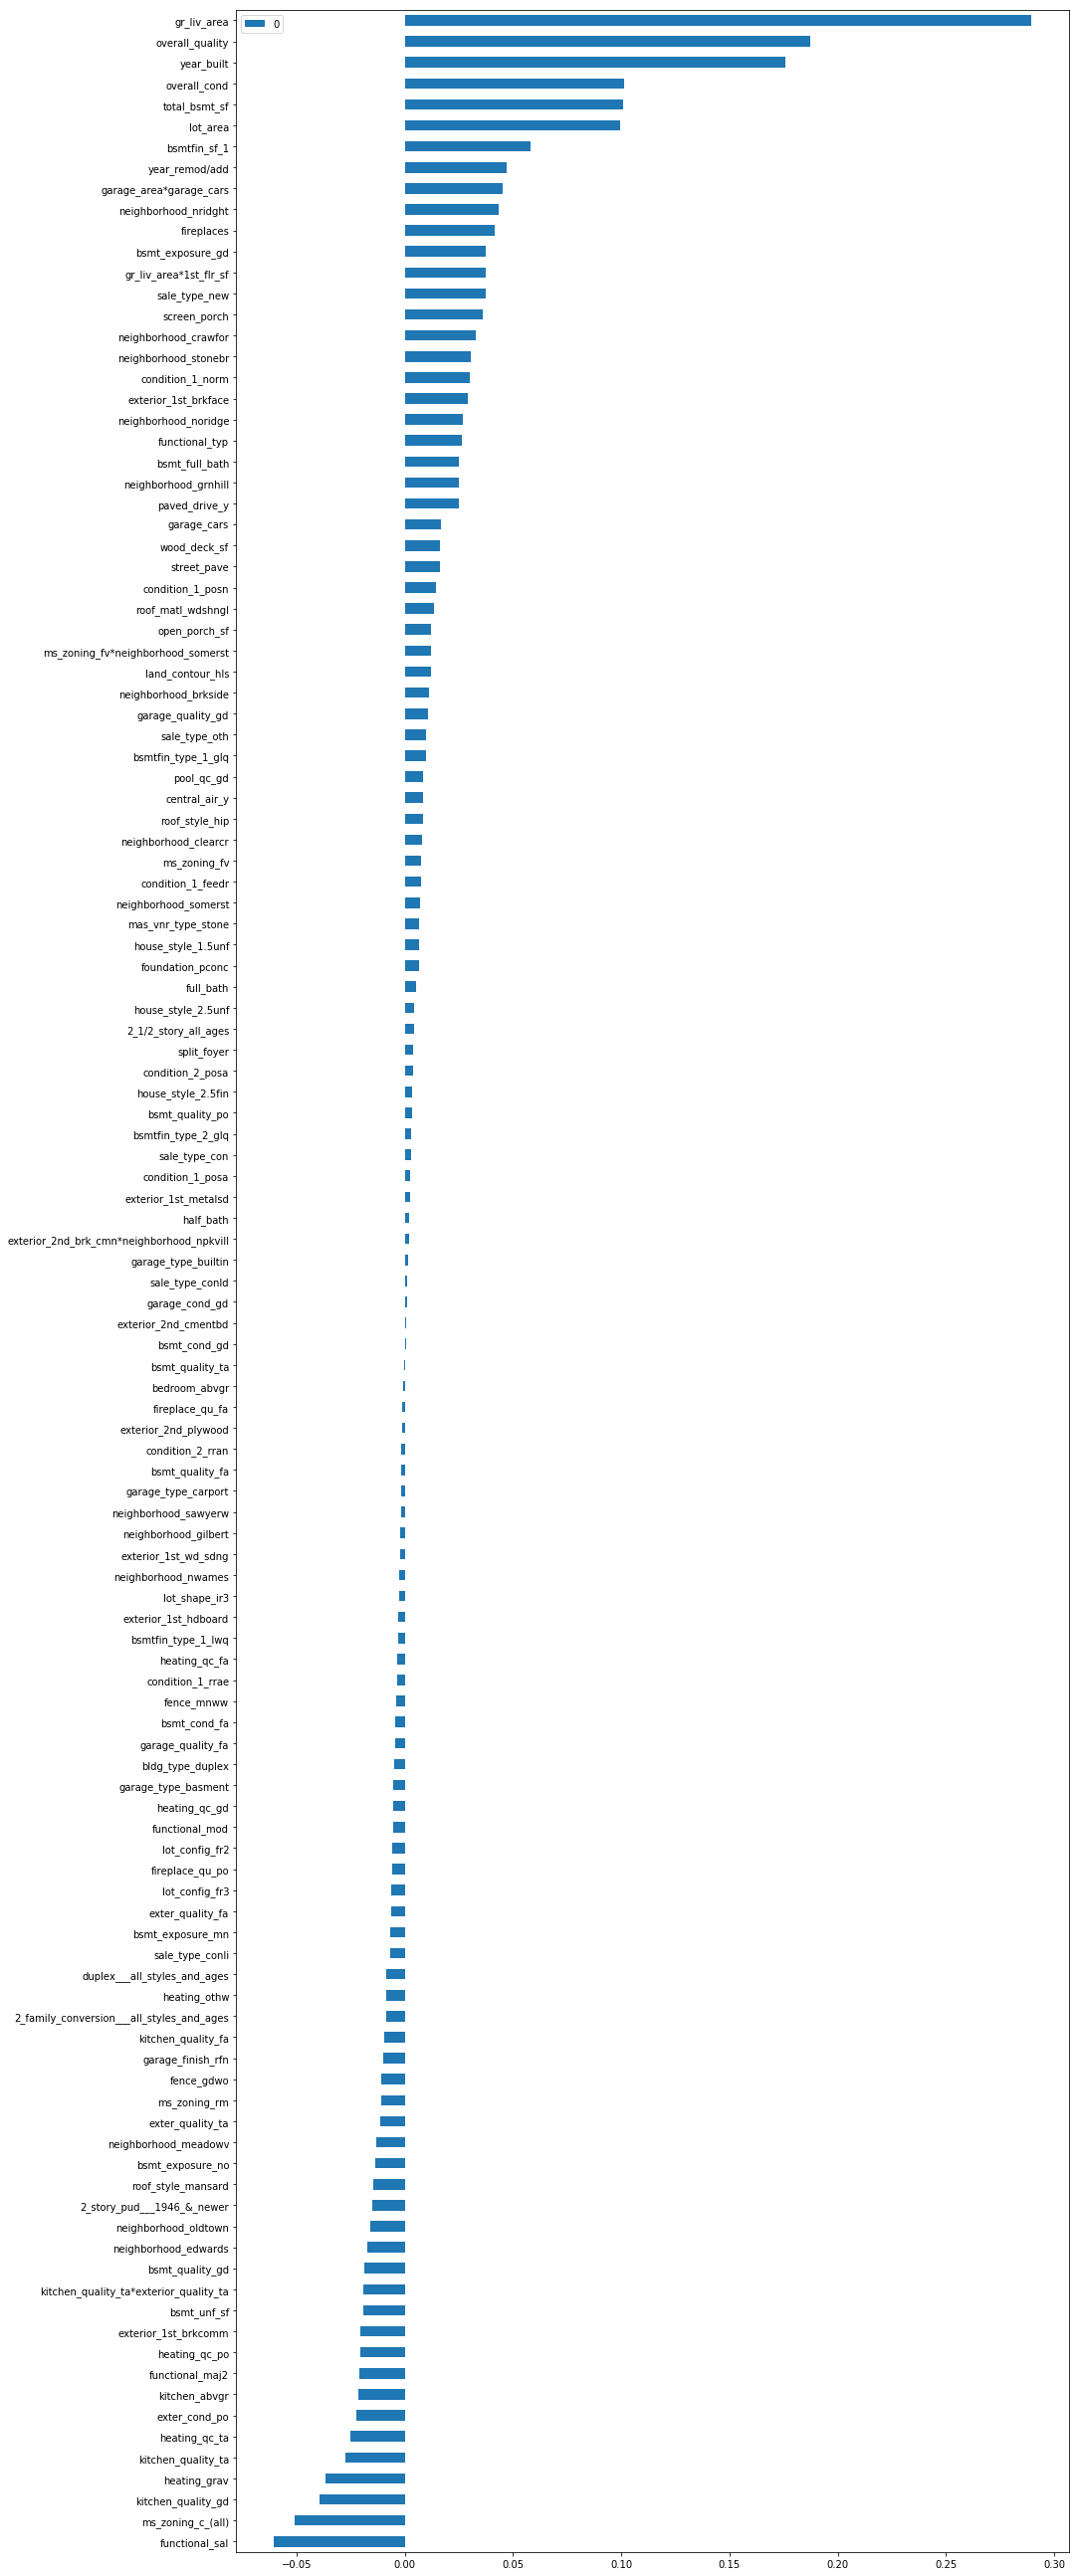

In [243]:
# Removing features with coef of 0

relevant_coefs=coef_df[coef_df[0]!=0]
relevant_coefs.plot.barh(figsize=(15, 47));

/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


 The Linear Regression score is -1.9769187411201084e+23.
 
 The Ridge score is 0.9215913064780182.
 
 The lasso score is 0.9218468330212635.
 


/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso was the closest model and returned a test score of 0.9070230578080155.
 
The R2 score is: 0.943450840871449.


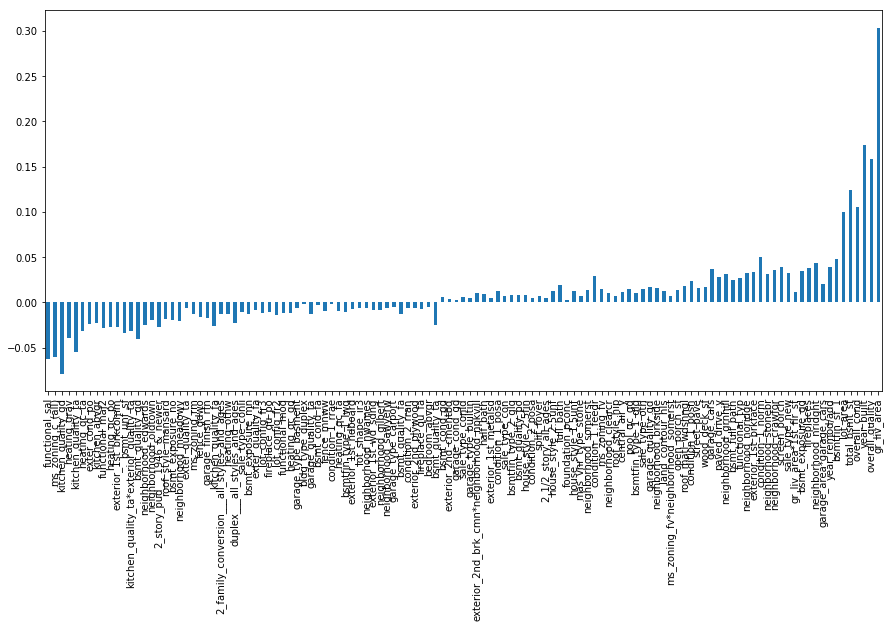

In [244]:
features_8 = relevant_coefs.index
multi_model_test(train, test, features_8, 'saleprice', 8)

/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


 The Linear Regression score is -1.9769187411201084e+23.
 
 The Ridge score is 0.9215913064780182.
 
 The lasso score is 0.9218468330212635.
 


/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso was the closest model and returned a test score of 0.9070230578080155.
 
The R2 score is: 0.943450840871449.


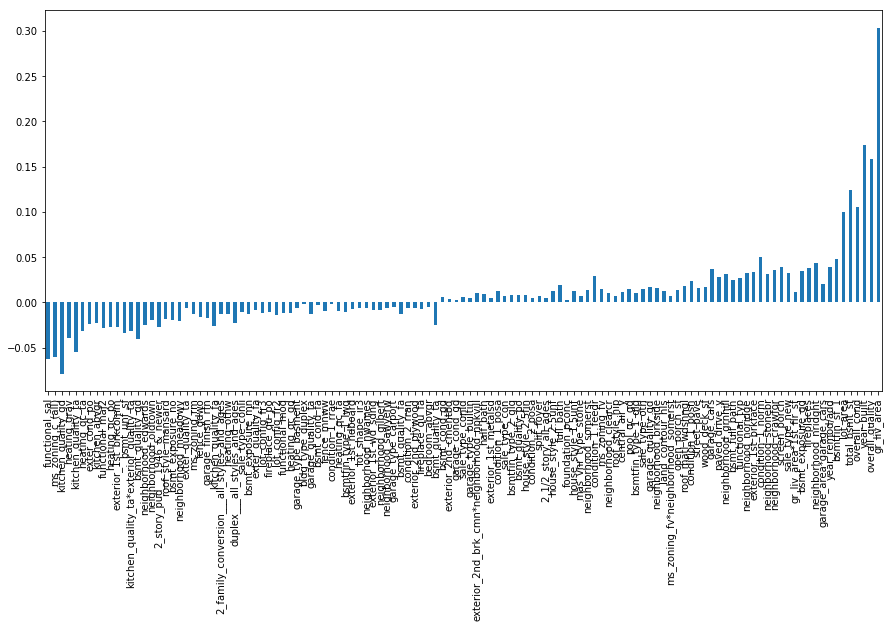

In [245]:
# Removing coefs below 0.1
coef_greater_than=coef_df[abs(coef_df[0]) >0.1]
features_9=coef_greater_than.index
multi_model_test(train, test, features_8, 'saleprice', 9)

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pt = PowerTransformer()
pt.fit(X_train)
X_train = pt.transform(X_train)
X_test = pt.transform(X_test)
pt_y = PowerTransformer()

# PowerTransformer requires a matrix/DataFrame, 

# which is why we're using the .to_frame() method on y_train
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

In [248]:
features_8.shape

(121,)

In [286]:
# Trying more polynomial interactions
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# Fit and transform our X data.
X=train[features_8]
y=train['saleprice']
poly_X = poly.fit_transform(X)
poly_X
# multi_model_test(train, test, poly_X)
poly.get_feature_names(X.columns)
X_train, X_test, y_train, y_test = train_test_split(poly_X,
                    y, random_state=42)
ss = StandardScaler()
Z_train=ss.fit_transform(X_train) # Sometimes we say Z when X has been scaled
Z_test=ss.transform(X_test)

In [287]:
y_test.shape

(513,)

In [290]:
l_alpha = np.logspace(-3, 0, 100)  
lasso = LassoCV(n_alphas=100)
lasso.fit(Z_train, y_train)

/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [275]:
# Check Alpha
lasso.alpha_

370.1401364666497

In [276]:
lasso.score(Z_train, y_train)

0.9267108098429384

In [277]:
Z_test.shape

(513, 270)

In [280]:
y_train.shape

(1536,)

In [279]:
y_test.shape

AttributeError: 'list' object has no attribute 'shape'

In [268]:
lasso.score(Z_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [4, 513]

In [298]:
Poly_X=pd.DataFrame(poly_X)

In [1]:
pd.set_option('display.max_rows', 500)
poly_X_nz=poly_X[(poly_x.corr[['saleprice']]>.2)].sort_values(by = target, 
                                                    ascending=False)
# hi_corr=Poly_X.corr().abs().unstack().sort_values(kind="quicksort", ascending=False)
# hi_corr[500:585]
poly_X_nz.shape
# y= df[target]
#     plt.figure(figsize=(10,50))
#     sns.heatmap(df.corr()[[target]].sort_values(by = target, 
#                                                     ascending=False),
#                annot = True,
#                cmap='RdBu_r',

#                );
# poly_coef=pol[coef_df[0]!=0]

NameError: name 'pd' is not defined

In [292]:
y=train['saleprice']
X=poly_X
# Test Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale variables
pt = PowerTransformer()
pt.fit(X_train)
X_train = pt.transform(X_train)
X_test = pt.transform(X_test)
ss = StandardScaler()
Z_train=ss.fit_transform(X_train) # Sometimes we say Z when X has been scaled
Z_test=ss.transform(X_test)

# Convert back to matrix / Dataframe
pt_y = PowerTransformer()
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())
    
# 
# Test 3 models    
lr = LinearRegression()
lr_scores = cross_val_score(lr, Z_train, y_train_pt, cv=5)
lasso = LassoCV(n_alphas=200, cv=5)
lasso_scores = cross_val_score(lasso, Z_train, y_train_pt[:, 0], cv=5)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge_scores = cross_val_score(ridge, Z_train, y_train_pt, cv=5)
print(f' The Linear Regression score is {lr_scores.mean()}.')
print(" ")
print(f' The Ridge score is {ridge_scores.mean()}.')    
print(" ")
print(f' The lasso score is {lasso_scores.mean()}.')
print(" ")
if ((lr_scores.mean() > ridge_scores.mean()) and (lr_scores.mean() > lasso_scores.mean())):
    lr.fit(Z_train, y_train_pt)
    lr.score(Z_train, y_train_pt)
    lr_test_score = lr.score(Z_test, y_test_pt)
    print(f'Linear Regression was the closest model and returned a test score of {lr_test_score}.')
    print(" ")
    pred = lr.predict(Z_test)
    pred_reversed = pt_y.inverse_transform(pred.reshape(-1,1))
    print(f'The R2 score is: {r2_score(y_test, pred_reversed)}.')
    model=lr
    pd.Series(lr.coef_, index=features).plot.bar(figsize=(15, 7));
elif ((lasso_scores.mean() > ridge_scores.mean()) and 
(lasso_scores.mean() > lr_scores.mean())):
    lasso.fit(Z_train, y_train_pt)
    lasso.score(Z_train, y_train_pt)
    lasso_test_score = lasso.score(Z_test, y_test_pt)
    print(f'Lasso was the closest model and returned a test score of {lasso_test_score}.')
    print(" ")
    pred = lasso.predict(Z_test)
    pred_reversed = pt_y.inverse_transform(pred.reshape(-1,1))
    print(f'The R2 score is: {r2_score(y_test, pred_reversed)}.')
    model=lasso
    pd.Series(lasso.coef_, index=features).plot.bar(figsize=(15, 7));
else:
    ridge.fit(Z_train, y_train_pt)
    ridge.score(Z_train, y_train_pt)
    ridge_test_score = ridge.score(X_test, y_test_pt)
    print(f'Ridge was the closest model and returned a test score of {ridge_test_score}.')
    print(" ")
    pred = ridge.predict(Z_test)
    pred_reversed = pt_y.inverse_transform(pred.reshape(-1,1))
    print(f'The R2 test score is: {r2_score(y_test, pred_reversed)}.')
    print(f'Ridge Coef = {ridge.coef_}')
    model=ridge
    pd.Series(data=ridge.coef_[0], index=features).plot.bar(figsize=(15, 7));

# # Scale variables and Prep Test data and Submission
# X_submit = test_dataframe[features]
# X_submit = pt.transform(X_submit) 
# pred = model.predict(X_submit)
# pred_reversed = pt_y.inverse_transform(pred.reshape(-1,1))
# submit = pd.DataFrame()
# submit['Id'] = test_dataframe.loc[:,'id']
# submit['SalePrice'] = pred_reversed
# filename='submission_'+str(model_number)
# submit.to_csv(f'../Submissions/{filename}.csv',index=False)

/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Users/allanshomefolder/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


KeyboardInterrupt: 

In [ ]:
features_11 = polyx.columns